## Introduction 
Mushroom is an important fungus which contains a good source of vitamin B and a large amount of protein when compared to all other vegetables. It helps to prevent cancer, useful in weight loss and increases the immunity power of human. On the other hand, some mushrooms are toxic and can prove dangerous if we eat them. 

In this project, we will use the data ( which is available on Kaggle https://www.kaggle.com/uciml/mushroom-classification ) to prediect where a mushroom contains toxicity or not. The remakable obtained result is that the accuracy of this model is really high (almost 100% for Logistic Regression and 100% for Neural Network at SVM). But there is no variable that is highly correlated with the response variable. All of the predictors are magically combined with each other to create a highly-confident preditor for the response variable.


## Import some important libraries and getting started with data

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [38]:
data = pd.read_csv("mushrooms.csv") # read the data

In [40]:
data
# as we can see, all the data is coded by text, we will try to transform it to numerical form. 
# The variable "class" is the one that we need to predict.

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [41]:
data.columns
# take all the name of data's columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [42]:
mappings = list()
encoder = LabelEncoder()
for column in range(len(data.columns)):
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)
mappings
#create a mapping that contains the text form corresponding to numerical form for every individuals of each variable
# we are using the object "LabelEncoder" from sklearn.

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [43]:
y = data['class']
X = data.drop('class', axis=1)
# we separate the "class" variable from the data because we need to predict this variable form all of the other variables
# simply using "drop" from the axis 1 (vertical axis)

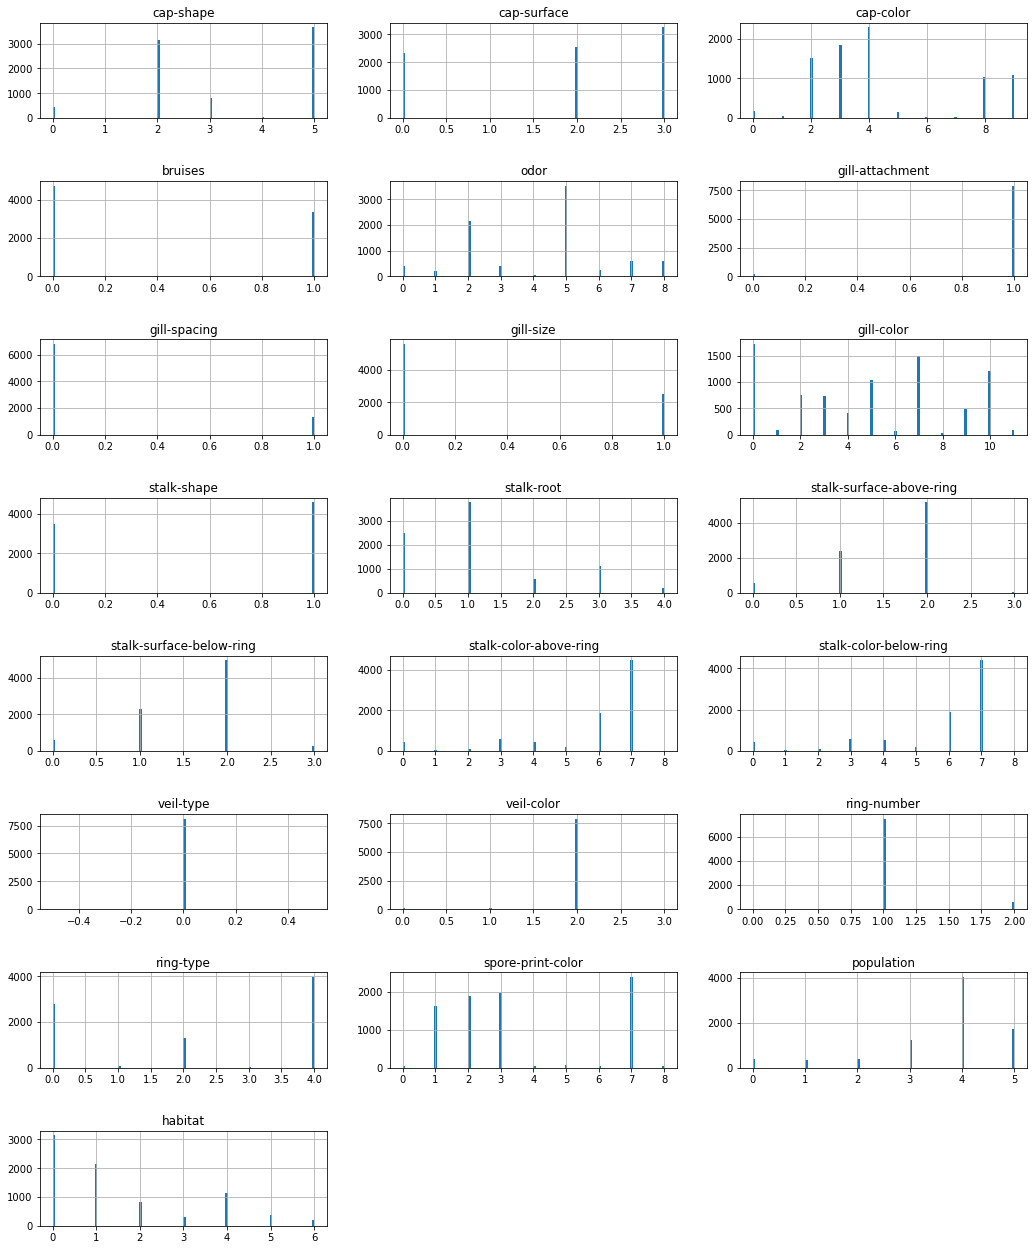

In [48]:
# we count how many individuals in each value of each variable.
plt.figure(figsize=(15,18))
for (i,j) in zip(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],range(22)):
    plt.subplot(8,3,j+1)
    X[i].hist(bins=100)
    plt.title(i)
plt.tight_layout(pad=3.0)
plt.show()

We can see that all features have different ranges. So, normalization is required. We use StandardScaler() form Sklearn to do.
The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

In [49]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [30]:
# we split data to train set and test set, which is really important step for training model.
# We will not use the test set for training model, just for tesing the perfomance of our model.
# We will use 80% data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size=0.8)

## Model Selection

Here we use three model:

Logistic Regression

Support Vector Machine for classification

Neural Network with two layer

In [31]:
log_model = LogisticRegression()
svm_model = SVC(C=1.0, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128,128))

## Trainning

In [32]:
np.sum(y)/len(y)
# we have almost 50% the amount of mushroom is toxic and 50% is not.
# when the data is symetric,it is good for us when we don't prioritize for any kind of mushroom

0.48202855736090594

In [33]:
log_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
nn_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [34]:
print(f"---Logistic Regression: {log_model.score(X_test, y_test)}")
print(f"Support Vector Machine: {svm_model.score(X_test, y_test)}")
print(f"--------Neural Network: {nn_model.score(X_test, y_test)}")

---Logistic Regression: 0.9581538461538461
Support Vector Machine: 1.0
--------Neural Network: 1.0


It is remakerbale when we have 100% accuracy rate on the test set. Let take a look at the correlation between the variable

In [50]:
X_test.shape

(1625, 22)

<AxesSubplot:>

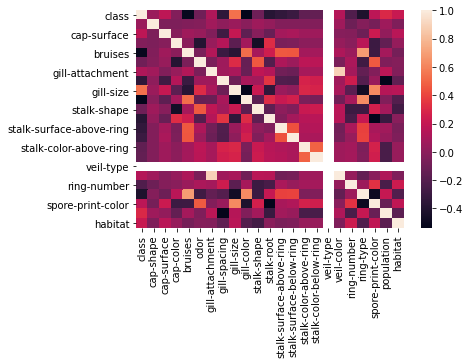

In [51]:
corr = data.corr()

sns.heatmap(corr)

There is no variable that is highly correlated with the response variable. All of the predictors are magically combined with each other to create a highly-confident preditor for the response variable.